<a href="https://colab.research.google.com/github/wksiazak/SVM_breast_cancer/blob/master/SVM_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial data analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
breast_cancer  = pd.read_csv('breast_cancer.csv')

In [3]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    object
dtypes: int64(9), object(2)
memory usage: 60.2+ KB


In [5]:
breast_cancer.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [6]:
breast_cancer['Class'].unique()

array(['benign', 'malignant'], dtype=object)

In [7]:
breast_cancer['Bare Nuclei'].value_counts()

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [8]:
breast_cancer.shape

(699, 11)

In [9]:
question_marks = 16/699
print(question_marks*100, "%")

2.28898426323319 %


2% of data set includes "question marks" in feature 'Bare Nuclei', as it is not meaningful amount let's drop this part

In [4]:
rows_to_drop = breast_cancer[breast_cancer['Bare Nuclei']=='?'].index
breast_cancer.drop(rows_to_drop, inplace=True)
breast_cancer.reset_index(drop=True, inplace=True)

In [5]:
breast_cancer['Bare Nuclei'] = breast_cancer['Bare Nuclei'].astype(int)

Let's convert also feature "Class" into numeric type of data to build our prediction model.  

In [6]:
breast_cancer['Class'] = breast_cancer['Class'].replace({'malignant': 1, 'benign': 0})

In [7]:
breast_cancer.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Let's remove also "Sample  code number" as it will not impact on our data model for predicting "Class".

In [8]:
breast_cancer.drop('Sample code number',axis = 1, inplace=True)

In [9]:
breast_cancer_corr = breast_cancer.corr()

<Axes: >

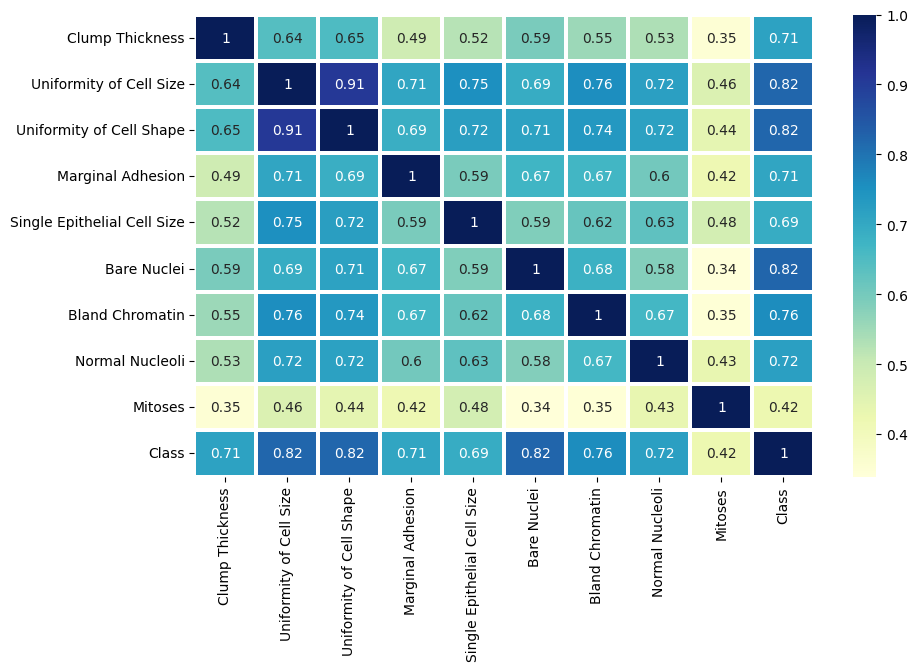

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(breast_cancer_corr,
            annot=True,
            linewidths=1.5,
            cmap="YlGnBu")

In [11]:
y = breast_cancer.pop('Class')
X = breast_cancer


## SVC with linear kernel

In [12]:
svm_lin = SVC(kernel='linear')
svm_lin.fit(X,y)
pred_lin = svm_lin.predict(X)

In [13]:
print(classification_report(y, pred_lin))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       444
           1       0.95      0.97      0.96       239

    accuracy                           0.97       683
   macro avg       0.97      0.97      0.97       683
weighted avg       0.97      0.97      0.97       683



**Linear kernel** gave us very well predicition both for malignant and benign.  

## SVC with Poly kernel

In [14]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X,y)
pred_poly = svm_poly.predict(X)

In [15]:
print(classification_report(y, pred_poly))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.97      0.97      0.97       239

    accuracy                           0.98       683
   macro avg       0.98      0.98      0.98       683
weighted avg       0.98      0.98      0.98       683



## SVC with RBF (Gaussian) kernel

In [16]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X,y)
pred_rbf = svm_rbf.predict(X)

In [17]:
print(classification_report(y, pred_rbf))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       444
           1       0.96      0.98      0.97       239

    accuracy                           0.98       683
   macro avg       0.97      0.98      0.97       683
weighted avg       0.98      0.98      0.98       683



We see that all three kernels predicting classes (malignant and benign) with high accuracy.

Let's use GridSearchCV to find the best hiperparameters (kernel type and C and gamma values)

## Using GridSearchCV for the best hiperparamateres

In [18]:
params = {'kernel':['linear', 'poly', 'rbf'],
          'C':[0.001, 0.01, 0.1, 10],
          'gamma':[0.000001, 0.00001, 0.0001, 0.001, 0.01]}

In [19]:
svm = SVC()

In [20]:
searcher = GridSearchCV(svm, params)

In [21]:
searcher.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 10],
                         'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01],
                         'kernel': ['linear', 'poly', 'rbf']})

In [22]:
searcher.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [23]:
searcher.best_score_

0.9678402747960497

In [24]:
parameters = pd.DataFrame(searcher.cv_results_['params'])

In [25]:
parameters['accuracy'] = searcher.cv_results_['split0_test_score']

In [26]:
parameters.head()

,C,gamma,kernel,accuracy
0,0.001,0.000001,linear,0.912409
1,0.001,0.000001,poly,0.649635
2,0.001,0.000001,rbf,0.649635
3,0.001,0.000010,linear,0.912409
4,0.001,0.000010,poly,0.649635


Text(0.5, 1.0, 'Model accuracy depending on gamma')

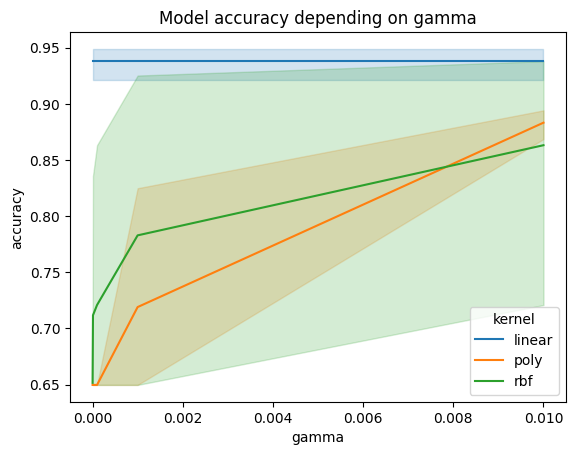

In [30]:
sns.lineplot(x='gamma', y='accuracy', data=parameters, hue='kernel')
plt.title("Model accuracy depending on gamma")

Text(0.5, 1.0, 'Model accuracy depending on C')

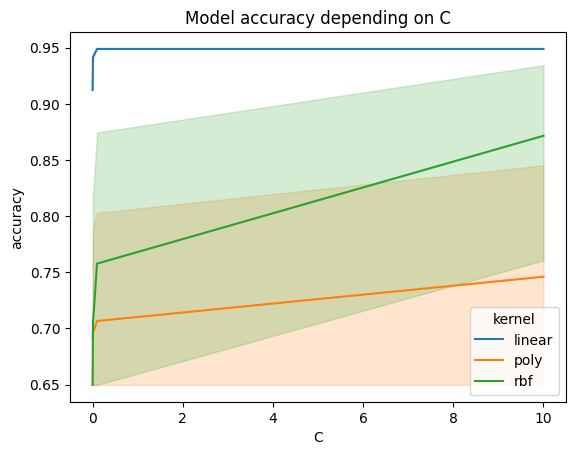

In [29]:
sns.lineplot(x='C', y='accuracy', data=parameters, hue='kernel')
plt.title("Model accuracy depending on C")

## Summary

Based on above visualizations in this data set we see that the best accuracy is for SVC with linear kernel.  
For both types of kernels we are receiving "good" results with accuracy above 90% - it may be a result of quite small dataset and clean data.  
In chart for gamma we see that higher values are referring to higher accurac, but it may inidicate overfitting.  